In [1]:
# 导入所需的包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from random import randint
from sklearn.metrics import confusion_matrix
import os
import itertools
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
# 使用 pandas 载入数据
df = pd.read_csv('creditcard.csv')

In [3]:
# 初见数据
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
# 提取 x 和 y, 以及大致分析数据
y = df.pop('Class')
del df['Time']
X = df.values
y = np.array(y)
num_fraud = np.count_nonzero(y)
print("Amount of data that is not fraudulent: {}".format(len(y)-num_fraud))
print("Amount of data that is fraudulent: {}".format(num_fraud))
print("Percentage of non fraud: {0:.2f}".format(100*(1-num_fraud/len(y))))
print("Percentage of fraud: {0:.2f}".format(100*(num_fraud/len(y))))

Amount of data that is not fraudulent: 284315
Amount of data that is fraudulent: 492
Percentage of non fraud: 99.83
Percentage of fraud: 0.17


In [5]:
# 我们可以观测到数据是高度 skew 的, 所以如果我们把所有 instances 都预测成 not fradulent 那么我们也能有 99.83% 的准确率, 但这明显不是我们想要的.
# 因此我们需要在已有数据集的基础上进行加工做出一个新的数据集.
x_stand = []
y_stand = []
for i in range(len(y)):
    if y[i] == 1:
        x_stand.append(X[i])
        y_stand.append(1)

for r in range(500):
    i = randint(0,len(y)-1)
    if y[i] == 0:
        x_stand.append(X[i])
        y_stand.append(0)

x_stand = np.array(x_stand)
y_stand = np.array(y_stand)

num_fraud = np.count_nonzero(y_stand)
print("Amount of data that is not fraudulent: {}".format(len(y_stand)-num_fraud))
print("Amount of data that is fraudulent: {}".format(num_fraud))
print("Percentage of non fraud: {0:.2f}".format(100*(1-num_fraud/len(y_stand))))
print("Percentage of fraud: {0:.2f}".format(100*(num_fraud/len(y_stand))))

Amount of data that is not fraudulent: 500
Amount of data that is fraudulent: 492
Percentage of non fraud: 50.40
Percentage of fraud: 49.60


In [6]:
# 现在我们建立一个前馈神经网络
epochs = 60
model = keras.Sequential([
    keras.layers.Dense(64,input_shape=(29,),activation='relu'), #输入层
    keras.layers.Dense(128,activation='relu'), # 隐层 1
    keras.layers.Dense(64,activation='relu'), # 隐层 2
    keras.layers.Dense(2,activation='softmax') # 输出层
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1920      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 18,626
Trainable params: 18,626
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
# 训练模型
model.compile(optimizer="Adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])
# model.fit 返回一个 History 对象, 记录每次 epoch 的相关信息 verbose: 日志参数
historico = model.fit(x_stand,y_stand,epochs=epochs,validation_split=0.1,verbose=1,shuffle=True)

Epoch 1/60
28/28 [==============================] - 0s 5ms/step - loss: 1.1085 - accuracy: 0.7679 - val_loss: 0.7178 - val_accuracy: 0.7900
Epoch 2/60
28/28 [==============================] - 0s 2ms/step - loss: 0.5262 - accuracy: 0.8789 - val_loss: 0.1276 - val_accuracy: 0.9900
Epoch 3/60
28/28 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.8980 - val_loss: 0.7473 - val_accuracy: 0.8200
Epoch 4/60
28/28 [==============================] - 0s 2ms/step - loss: 0.5479 - accuracy: 0.8991 - val_loss: 0.0822 - val_accuracy: 0.9900
Epoch 5/60
28/28 [==============================] - 0s 2ms/step - loss: 1.3077 - accuracy: 0.8520 - val_loss: 0.0593 - val_accuracy: 0.9900
Epoch 6/60
28/28 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.9103 - val_loss: 0.0910 - val_accuracy: 0.9800
Epoch 7/60
28/28 [==============================] - 0s 2ms/step - loss: 0.2836 - accuracy: 0.9260 - val_loss: 0.0863 - val_accuracy: 0.9800
Epoch 8/60
28/28 [==

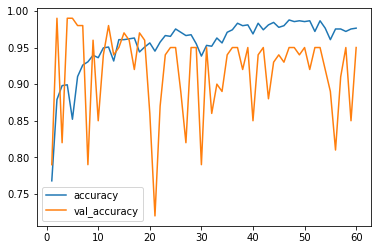

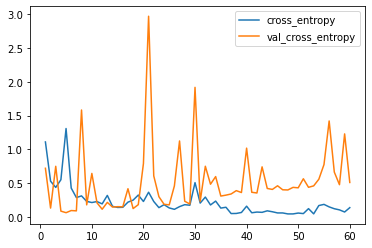

In [8]:
# 可视化 cross_entropy 和 accurcay
val = historico.history
plt.figure(0)
plt.plot(np.arange(1,len(val['accuracy'])+1),val['accuracy'],label='accuracy')
plt.plot(np.arange(1,len(val['val_accuracy'])+1),val['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(np.arange(1,len(val['loss'])+1),val['loss'],label='cross_entropy')
plt.plot(np.arange(1,len(val['val_loss'])+1),val['val_loss'],label='val_cross_entropy')
plt.legend()
plt.show()

Confusion Matrix without Normalization
[[566  34]
 [ 10 482]]


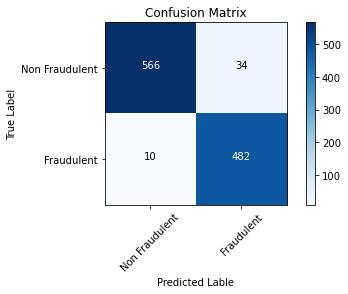

Confusion Matrix with Normalization
[[0.94333 0.05667]
 [0.02033 0.97967]]


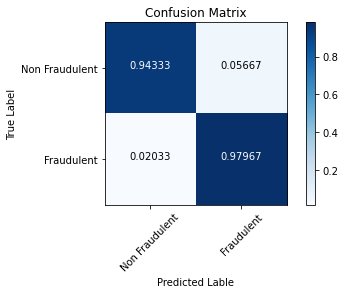

In [9]:
# 从新取数据
x_stand = []
y_stand = []
for i in range(len(y)):
    if y[i] == 1:
        x_stand.append(X[i])
        y_stand.append(1)

for r in range(600):
    i = randint(0,len(y)-1)
    if y[i] == 0:
        x_stand.append(X[i])
        y_stand.append(0)

x_stand = np.array(x_stand)
y_stand = np.array(y_stand)


# 绘制 confusion matrix
def plot_confusion_matrix(cm,classes,normalize=False,title="Confusion Matrix",cmap=plt.cm.Blues):
    if normalize:
        print("Confusion Matrix with Normalization")
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        cm = np.round(cm,decimals=5)
    else:
        print("Confusion Matrix without Normalization")
    
    print(cm)
    
    plt.imshow(cm,interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
            horizontalalignment="center",
            color="white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.xlabel("Predicted Lable")
    plt.ylabel("True Label")

comp = model.predict(x_stand)
comp = np.array([np.argmax(u) for u in comp])
cm = confusion_matrix(y_stand,comp)
plot_confusion_matrix(cm=cm,classes=["Non Fraudulent","Fraudulent"],title="Confusion Matrix")
plt.show()
plt.figure(1)
plot_confusion_matrix(cm=cm,classes=["Non Fraudulent","Fraudulent"],title="Confusion Matrix",normalize=True)

Confusion Matrix without Normalization
[[268027  16288]
 [    10    482]]


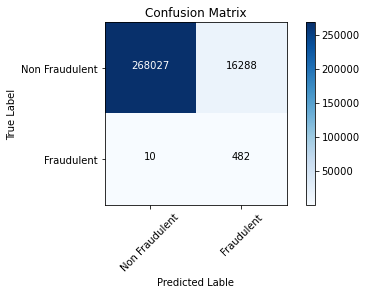

Confusion Matrix with Normalization
[[0.94271 0.05729]
 [0.02033 0.97967]]


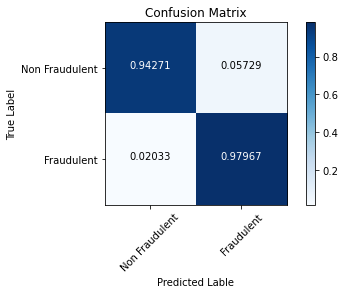

In [10]:
# 现在让我们来在整个数据集上run我们的模型
cm = confusion_matrix(y,np.array([np.argmax(u) for u in model.predict(X)]))
plot_confusion_matrix(cm=cm,classes=["Non Fraudulent","Fraudulent"],title="Confusion Matrix",normalize=False)
plt.show()
plt.figure(1)
plot_confusion_matrix(cm=cm,classes=["Non Fraudulent","Fraudulent"],title="Confusion Matrix",normalize=True)